<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_4%EC%9E%A5_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8_p_157_202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**4. 모델훈련**
**4.1 선형회귀**
- 입력 특성의 가중치 합과 편향이라는 상수를 더해 예측을 한다.
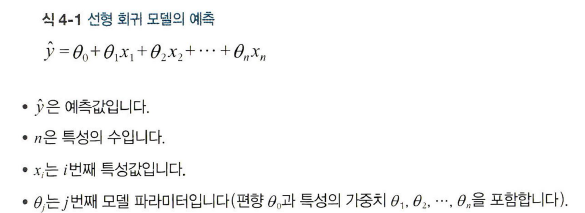

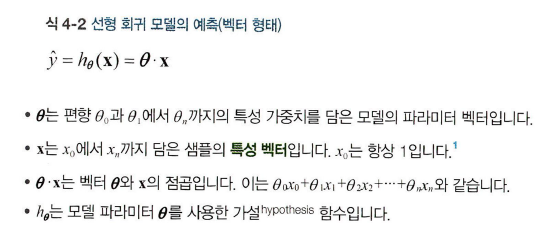

- 가장 널리 사용되는 성능 측정 지표는 평균 제곱근 오차(RMSE)
- RMSE를 최소화하는 theta 를 찾아야 선형회귀 모델을 훈련시킬 수 있다.
- 실제로는 MSE를 최소화하는 것이 같은 결과를 불러온다.
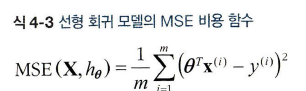

**4.1.1 정규방정식**
- 비용함수를 최소화하는 theta값을 찾기위한 방정식

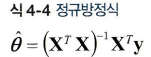


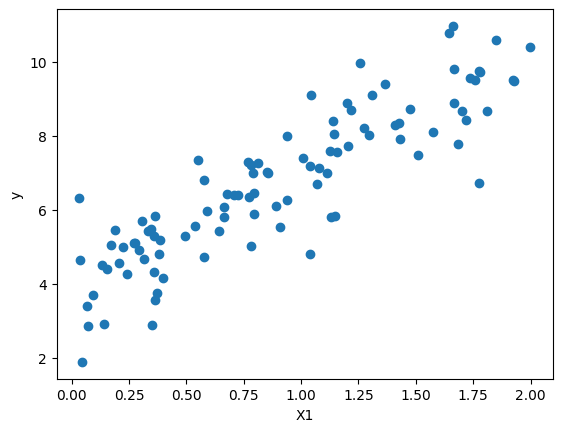

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)
plt.scatter(X,y)
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [ ]:
#정규방정식을 사용해 theta hat을 계산한다.
X_b = np.c_[np.ones((100,1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[3.86867827],
       [3.16713092]])

잡음으로 원래 함수의 파라미터 재현X

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86867827],
       [10.20294011]])

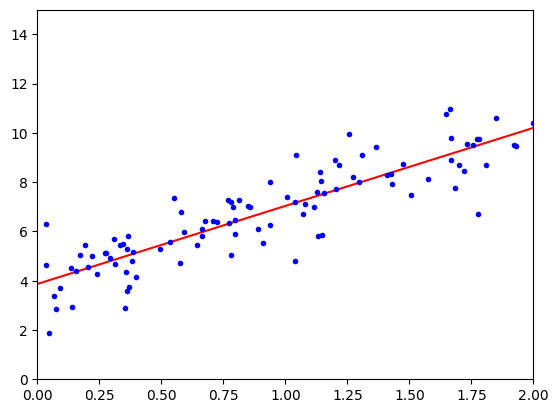

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.86867827] [[3.16713092]]
[[ 3.86867827]
 [10.20294011]]


In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86867827],
       [3.16713092]])

유사역행렬을 직접구하는 법

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.86867827],
       [3.16713092]])

- 유사역행렬은 특잇값 분해라 부르는 표준 행렬 분해 기법을 사용하여 계산
- 다음과 같이 계산
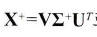

- sigma+를 계산하기 위해 sigma를 먼저 구하고 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꾼다. 그리고 0이아닌 모든 값을 역수로 치환하고 행렬을 전치한다.
- 정규방정식보다 효율적

**4.1.2 계산복잡도**

정규방정식은 (n+1)x(n+1) 크기가 되는 XtX의 역행렬을 계산한다.

- 역행렬을 계산하는 것은 계산 복잡도
- LinearRegression이 사용하는 SVD방법은 O(n^2)이다. 특성의 개수가 두배로 늘어나면 계산시간이 4배가 된다.

**4.2 경사하강법(GD)**

- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 알고리즘
- 비용함수르 최소화하기 위해 반복하여 파라미터 조정
- 파라미터 벡터 theta에 대해 비용함수의 현재 그래디언트를 계산한다. 그이후 그래디언트가 감소하는 방향으로 진행하고 0이되면 최솟값에 도달한 것이다.

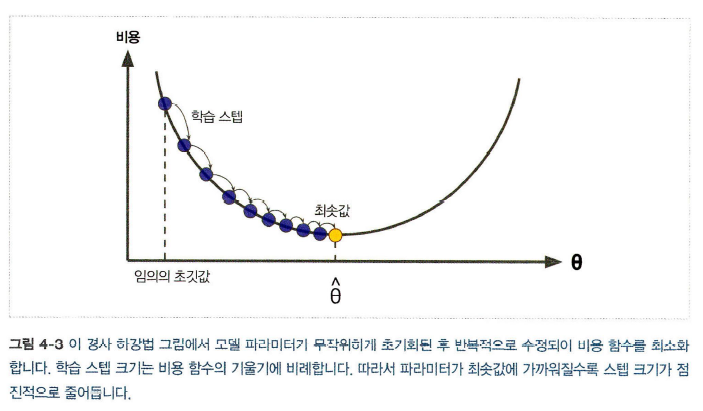

- 스텝의 크기가 중요한 파라미터-학습률 하이퍼파라미터로 결정
- 문제점
- - 무작위 초기화때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴한다.오른쪽에서 시작하면 시간이 오래걸리고 일찍멈추게되어 전역최솟값에 도달하지 못한다.


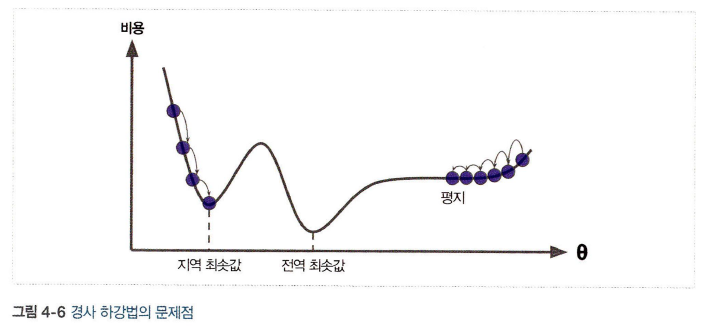

- MSE비용함수는 곡선에서 두점을 선택해 그어도 곡선을 지나지 않는 볼록함수. 오직 한가지의 전역 최솟값을 가지고 있다. 따라서 경사하강법이 전역 최솟값에 가깝게 접근할 수 있다.
- 파라미터공간에서 찾는다는 말은 비용함수를 최소화하는 모델 파라미터 조합을 찾는 것과 같다.


**4.2.1 배치 경사 하강법**
- 편도함수: 각모델 파라미터에 대해 비용함수의 그래디언트를 계산해야한다.

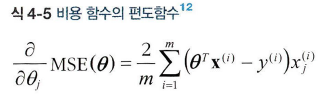

- 편도함수를 각각계산하는 대신 한꺼번에 계산하는 방법
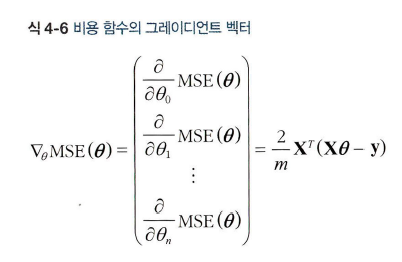

- 위로향하는 그래디언트 벡터가 구해지면 반대방향인 아래로 향해야한다. 따라서 다음과 같은 식을 구할때 학습률 eta가 사용된다.

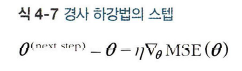

In [ ]:
eta = 0.1   # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)   # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[3.86867827],
       [3.16713092]])

eta를 바꾸었을 때 경사하강법

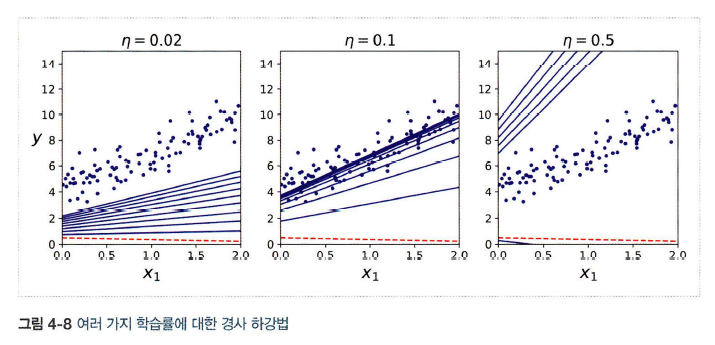

오른쪽으로 갈수록 학습률이 높아진다. 가운데 부분이 적당한 학습률을 보인다.
- 적정한 학습률을 찾기위해 그리드 탐색을 한다.
**4.2.2 확률적 경사 하강법**
- 배치경사하강법은 매스텝 전체훈련세트를 사용해 그래디언트 계산하는 것이 문제
- 확률적 경사하강법은 한개의 샘플을 추출해 그래디언트 계산

In [ ]:
# 확률적 경사하강법 구현
n_epochs = 50
t0, t1 = 5,50   # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)   # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

한반복에서 m번 반복되는데, 각 반복을 에포크라고 한다.

In [ ]:
theta

array([[3.85249893],
       [3.17168644]])

- SGD방식으로 선형회귀를 사용하려면 기본값으로 제곱 오차비용 함수를 최적화하는 SGDRegressor 클래스를 사용한다.

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)  # max_iter : 최대 에포크 횟수. tol : 손실이 줄어들 때까지 실행되는 기준. eta0 : 학습률. penalty : 규제
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.92491734]), array([3.21503528]))

정규방정식과 유사한 결과

**4.2.3 미니배치 경사 하강법**
- 행렬연산에 최적화된 하드웨어를 사용해 성능이 향상되는 장점이 있다.
- SGD보다 덜 불규칙적으로 움직인다.

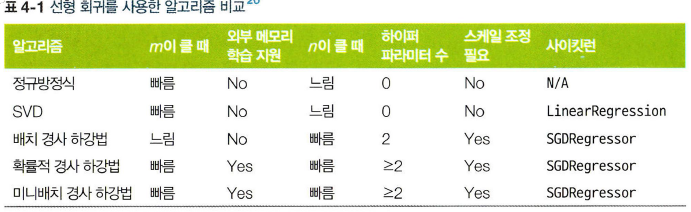

**4.3 다항회귀**
- 비선형 데이터를 학습하는데 선형모델을 사용할 수 있다.
- 각특성의 제곱을 새로운 특성으로 추가하는 특징이 있다.


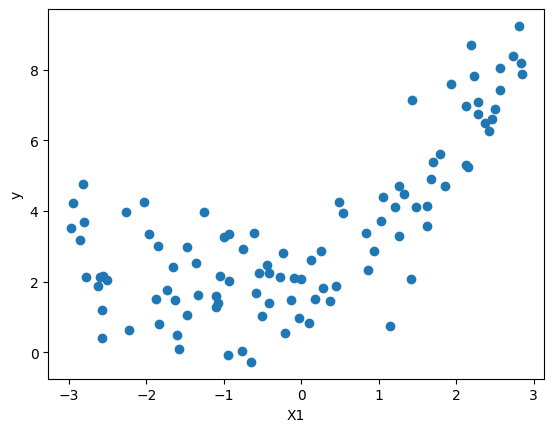

In [ ]:
# 2차방정식으로 비선형데이터 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.scatter(X,y)
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [ ]:
#훈련데이터 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.78064836])

In [ ]:
X_poly[0]

array([-2.78064836,  7.7320053 ])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.06312082]), array([[0.94791529, 0.4639303 ]]))

특성이 여러개일때 다항회귀는 이 특성사이 관계를 찾을 수 있다. PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문이다.


**4.4 학습곡선**

고차다항회귀를 적용하면 훈련데이터에 더 잘 맞추어질 것


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
  plt.ylim([0, 3.0])
  plt.xlabel('Train Set Size')
  plt.ylabel('RMSE')
  plt.legend()

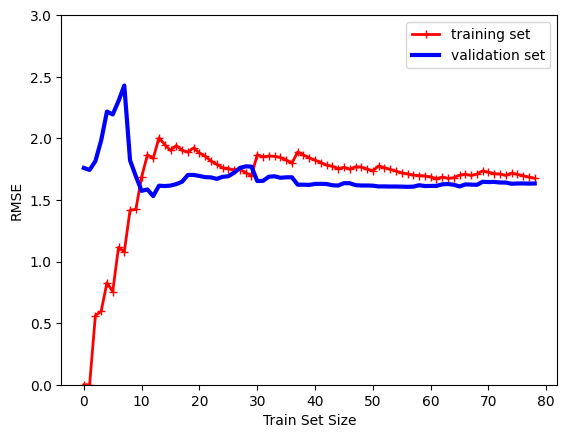

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- 훈련세트에 하나 혹은 두개의 샘플이 있으 ㄹ땐 모델이 완벽하게 작용하지만 샘플이 추가되면 잡음도 있고 비선형이라 완벽학습이 불가능해진다.

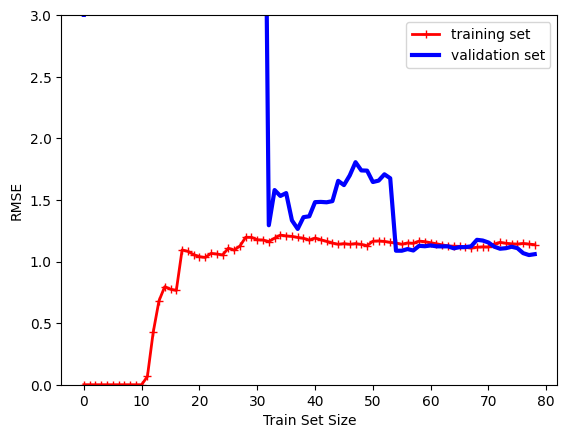

In [ ]:
#다항회귀모델의 학습곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

- 훈련데이터의 오차가 선형회귀 모델보다 낮다
- 두곡선사이 공간은 훈련데이터에서 모델성능이 검증데이터보다 낮다는 것을 의미한다. 과대적합 모델의 특징.

**4.5 규제가 있는 선형 모델**
- 과대적합 해소의 해결법은 모델 규제
- 다항회귀모델을 규제하는 방법은 다항식 차수 감소

**4.5.1릿지회귀**
- 규제가 추가된 선형 회귀
- 하이퍼파라미터 alpha는 모델을 얼마나 규제할지 조절한다. alpha=0이면 릿지회귀는 선형회귀와 같아진다.

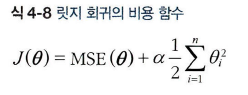

In [ ]:
#정규화방식을 사용한 릿지회귀 적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.81124404]])

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.80214756])

**4.5.2랏쏘회귀**
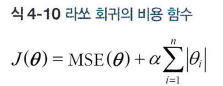

- 덜중요한 특성의 가중치를 제거하는 점
- 자동적으로 특성을 선택하고 희소모델을 만든다.
- 라쏘회귀에서 서브그래디언트 벡터를 사용하면 경사하강법을 적용하는데 문제가 없다.

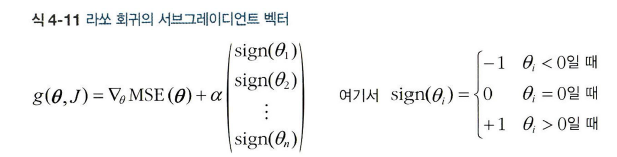

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) # 대신 SQDRegressor(penalty='l1') 사용 가능
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.76366359])

**엘라스틱넷**
- 릿지와 라쏘의 절충모델
- 혼합정도는 혼합비율 r을 사용해 조절
- r=0: 릿지회귀, r=1: 라쏘회귀
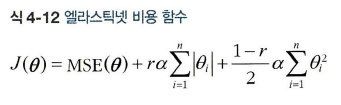

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.76654774])

**4.5.4조기종료**
-검증에러가 최솟값에 도달하면 훈련중지

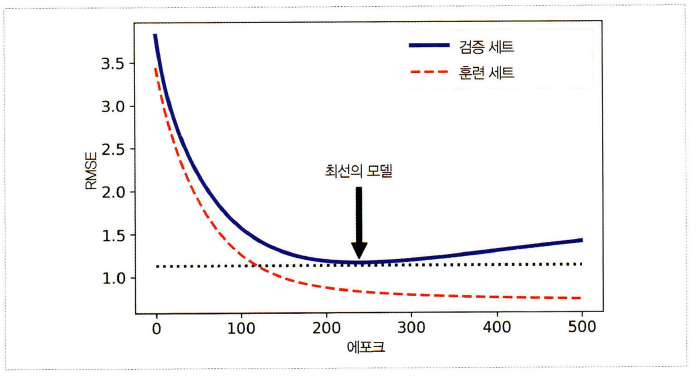

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

**4.6로지스틱회귀**
- 샘플이 특정 클래스에 속할확률을 추정하는데 사용

**4.6.1 확률추정**
- 입력특성의 가중치 합 계산

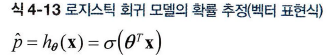

**4.6.2 훈련과 비용함수**
- 양성샘플은 높은확률을 추정하고 음성샘플은 낮은 확률을 추정하는 모델의 파라미터 벡터를 찾는것

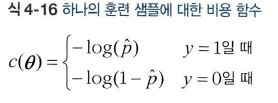

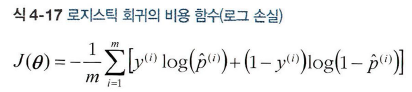


**4.6.3결정경계**

In [ ]:
# 데이터 불러오기
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:,3:]   # 꽃잎의 너비
y = (iris["target"]==2).astype(np.int)   # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [ ]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

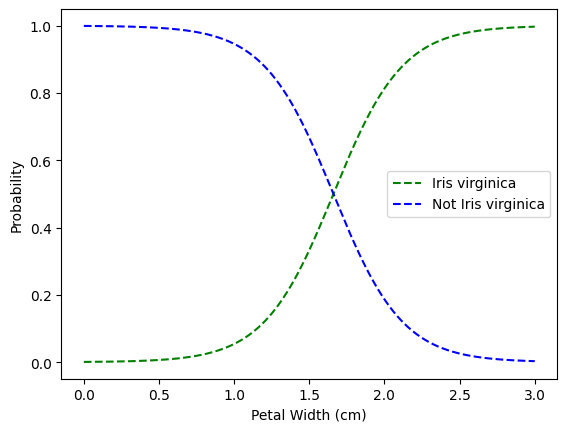

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g--", label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris virginica")
plt.legend()
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.show()

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

**4.6.4 소프트맥스회귀**
- 여러개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화
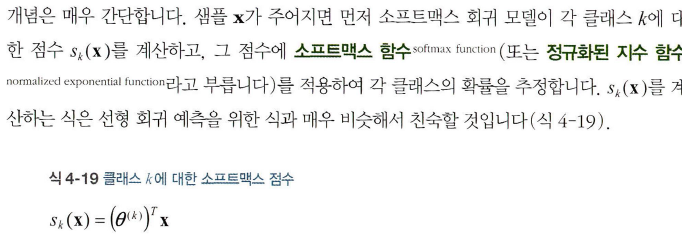

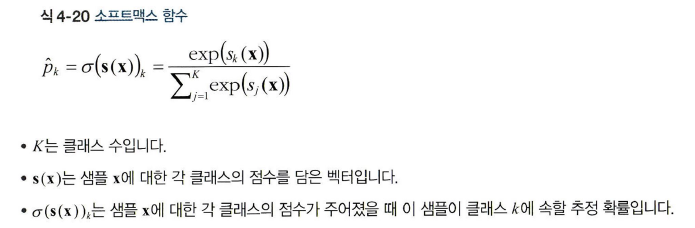

In [ ]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5,2]])

In [ ]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])